In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create path to sqlite
database_path = "../Resources/hawaii.sqlite"

# Create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()


In [6]:
# Use the Base class to reflect the database tables
#Base.prepare(engine, reflect=True)

Base.prepare(autoload_with=engine)


In [7]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create a session
Session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = Session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database.

last_12_months = Session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
last_12_months

# Calculate the date one year from the last date in data set.
date_one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_one_year



datetime.date(2016, 8, 23)

In [29]:
# Perform a query to retrieve the data and precipitation scores
perp_data_scores = Session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= date_one_year).\
    order_by(measurement.date).all()
perp_data_scores


#query = Session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()
#query



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

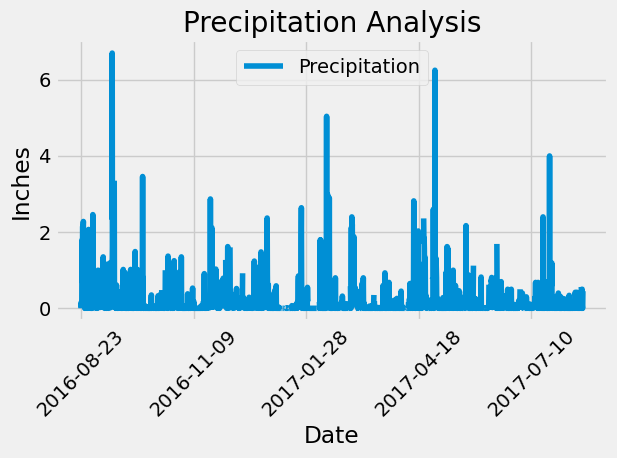

In [34]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
perp_data_scores_df = pd.DataFrame(perp_data_scores, columns=['Date', 'Precipitation'])
perp_data_scores_df

# Sort the dataframe by date
perp_data_scores_sorted = perp_data_scores_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
perp_data_scores_sorted.plot('Date', 'Precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.xticks(rotation=45)
plt.tight_layout()

#save the plot
plt.savefig("Precipitation.png")

plt.show()


In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
perp_data_scores_sorted.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(station.station).count()
total_stations


9

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = Session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = most_active_stations[0][0]
most_active_id
lowest_temp = Session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_id).all()
highest_temp = Session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_id).all()
average_temp = Session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_id).all()
lowest_temp, highest_temp, average_temp

([(54.0,)], [(85.0,)], [(71.66378066378067,)])

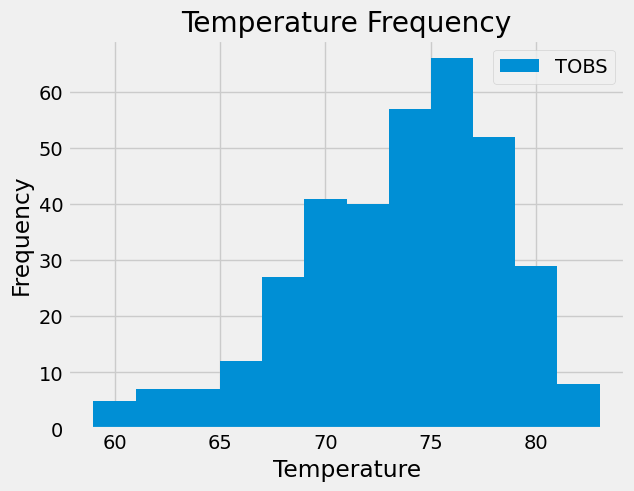

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temp = Session.query(measurement.tobs).filter(measurement.date >= one_year_ago).filter(measurement.station == most_active_id).all()
last_12_months_temp_df = pd.DataFrame(last_12_months_temp, columns=['TOBS'])
last_12_months_temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency')

#save the plot
plt.savefig("Temperature.png")

plt.show()


# Close Session

In [43]:
# Close Session
Session.close()
